In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
%matplotlib inline

In [3]:
# sns.set(rc={'figure.figsize':(10,8)})

In [4]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [6]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
dots = sns.load_dataset('dots')
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


In [8]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


# Dist plot

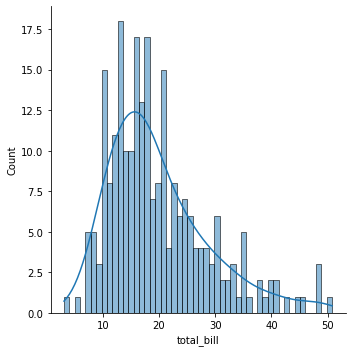

In [9]:
sns.displot(data=tips, x='total_bill',
            kde=True,
            bins=50)

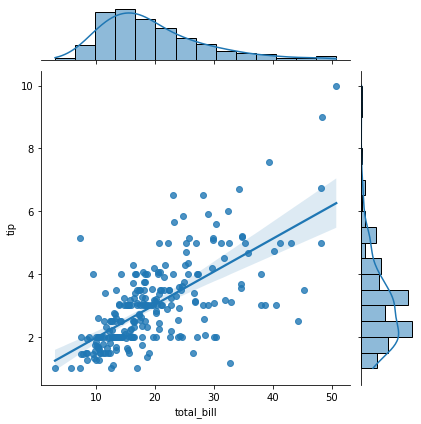

In [10]:
sns.jointplot(x='total_bill' , y='tip', data=tips,
              kind='reg')
### kind: 'scatter', 'hex', 'reg', 'kde'

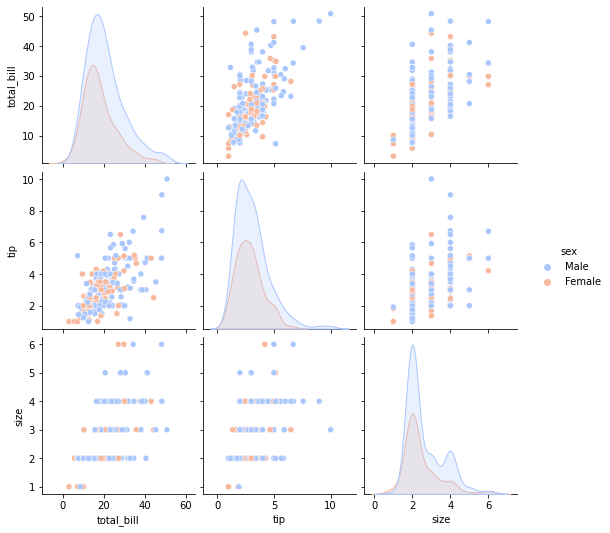

In [11]:
sns.pairplot(data=tips,
             hue='sex',
             palette='coolwarm')

<AxesSubplot:xlabel='total_bill'>

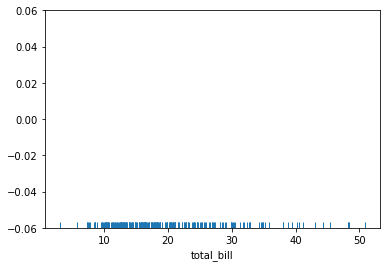

In [12]:
sns.rugplot(data=tips, x='total_bill')

# Categorical plot

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

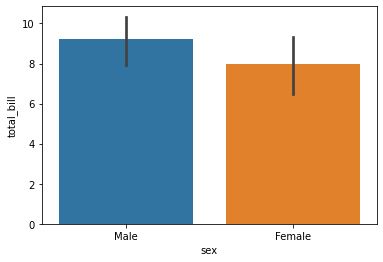

In [13]:
sns.barplot(data=tips, x='sex', y='total_bill',
            estimator=np.std)
### estimator: any aggregator function built-in or customized

<AxesSubplot:xlabel='sex', ylabel='count'>

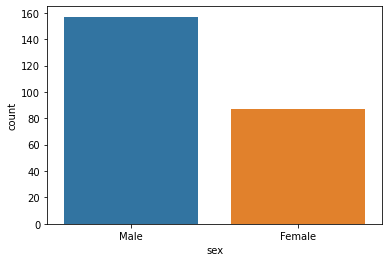

In [14]:
sns.countplot(data=tips, x='sex')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

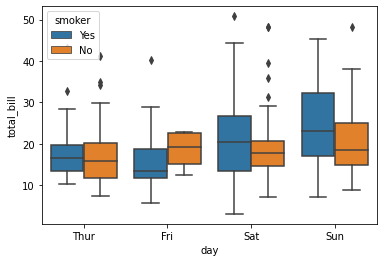

In [15]:
sns.boxplot(data=tips, x='day', y='total_bill',
            hue='smoker')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

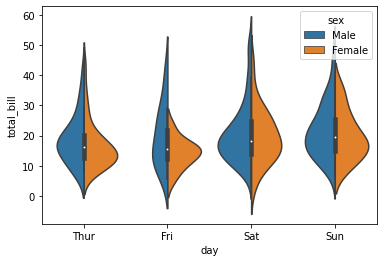

In [16]:
sns.violinplot(data=tips, x='day', y='total_bill',
               hue='sex',
               split=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

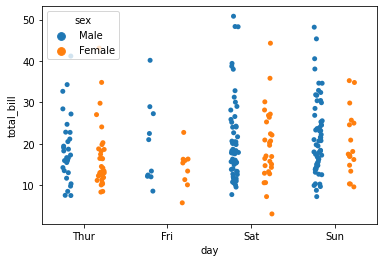

In [17]:
sns.stripplot(data=tips, x='day', y='total_bill',
              jitter=True,
              hue='sex',
              dodge=True)
### jitter: scatter points that have same value
### dodge: separate the two hues categories

<AxesSubplot:xlabel='day', ylabel='total_bill'>

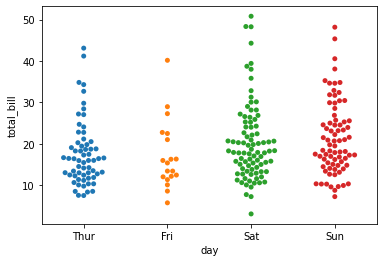

In [18]:
sns.swarmplot(data=tips, x='day', y='total_bill')

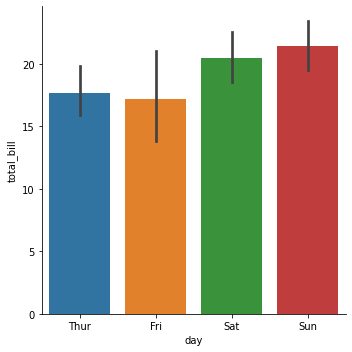

In [19]:
sns.catplot(data=tips, x='day', y='total_bill',
            kind='bar')

# Matrix plot

In [20]:
tc = tips.corr()
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

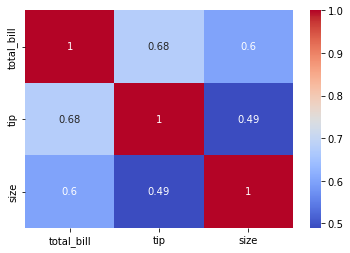

In [21]:
sns.heatmap(tc,
            annot=True,
            cmap='coolwarm')
### annot (annotation of the values)

In [22]:
fp = flights.pivot_table(index='month', columns='year', values='passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

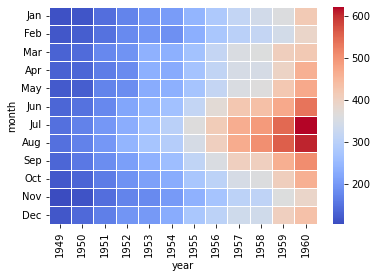

In [23]:
sns.heatmap(fp,
            cmap='coolwarm',
            linecolor='white',
            linewidths=1)

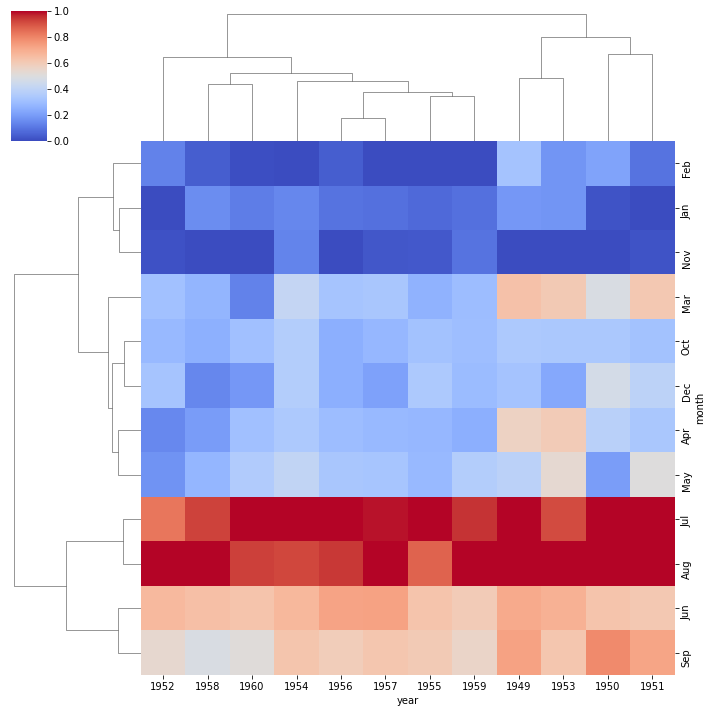

In [24]:
sns.clustermap(fp,
               cmap='coolwarm',
               standard_scale=1)

# Grid

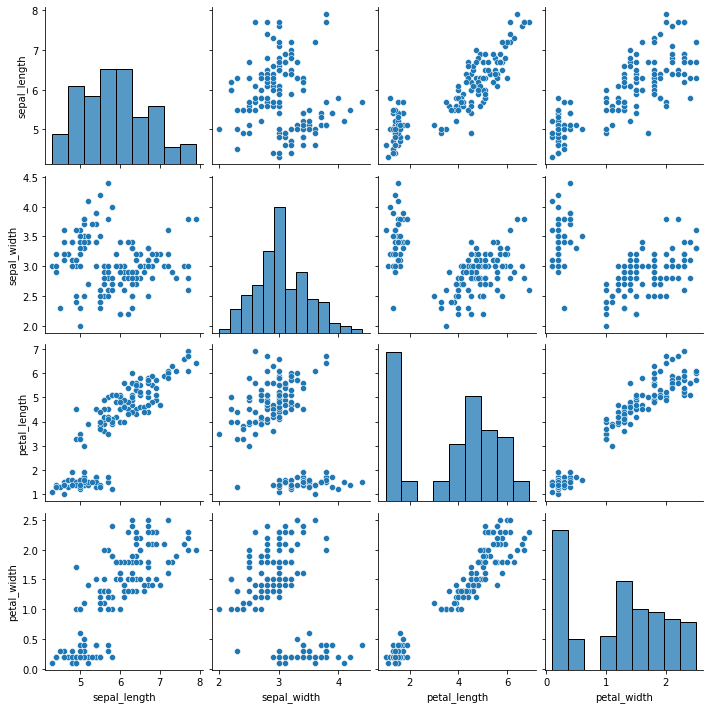

In [25]:
sns.pairplot(iris)

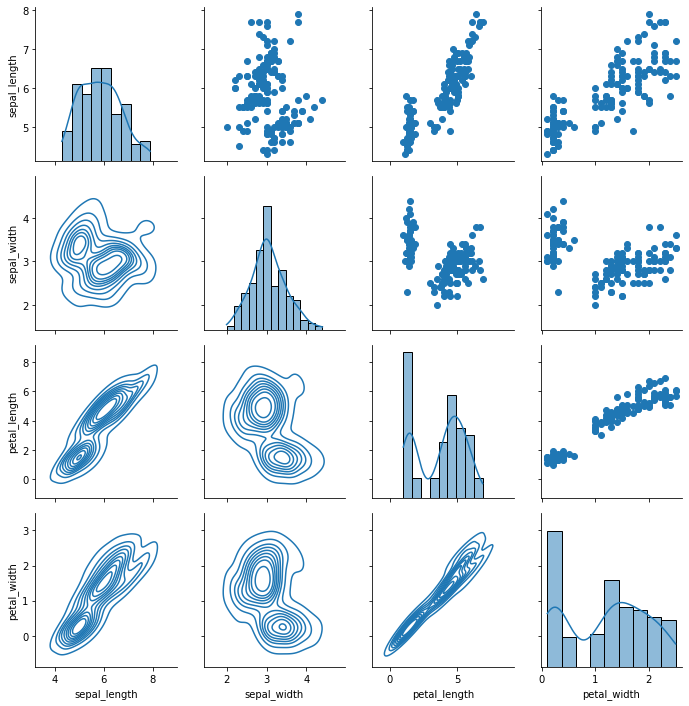

In [26]:
### customize
g = sns.PairGrid(iris)
g.map_diag(sns.histplot, kde=True)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

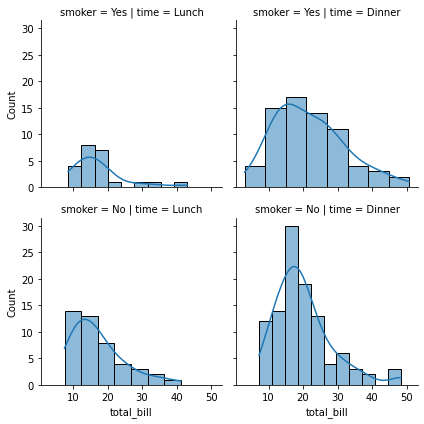

In [27]:
g = sns.FacetGrid(data=tips, col='time', row='smoker')
g.map(sns.histplot, 'total_bill', kde=True)

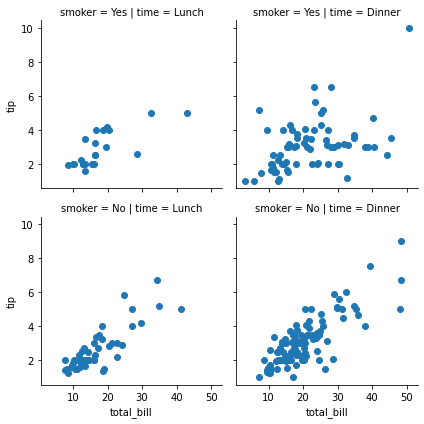

In [28]:
g = sns.FacetGrid(data=tips, col='time', row='smoker')
g.map(plt.scatter, 'total_bill', 'tip')

# Regression plot

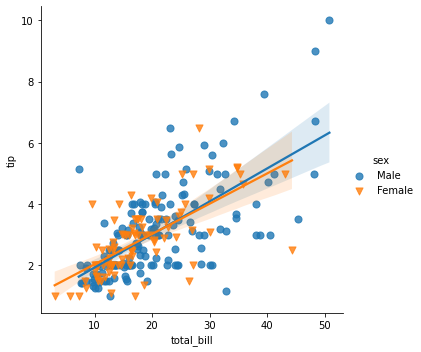

In [29]:
sns.lmplot(data=tips, x='total_bill', y='tip',
           hue='sex',
           markers=['o', 'v'],
           scatter_kws={'s': 50})
### 's': size

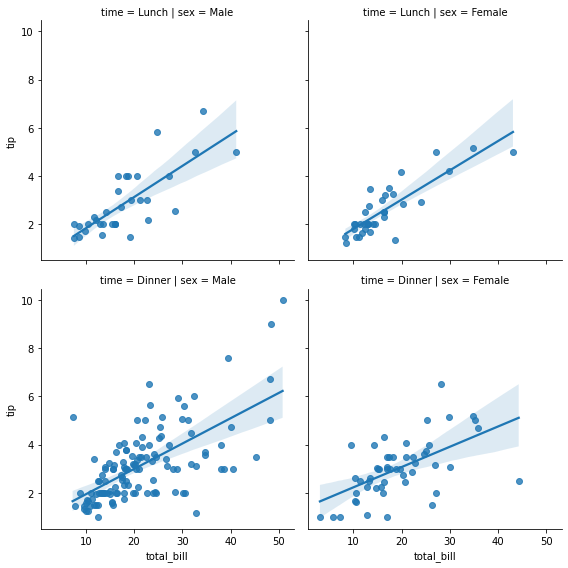

In [30]:
sns.lmplot(data=tips, x='total_bill', y='tip',
           col='sex',
           row='time',
           aspect=1,
           height=4)

# Relplot

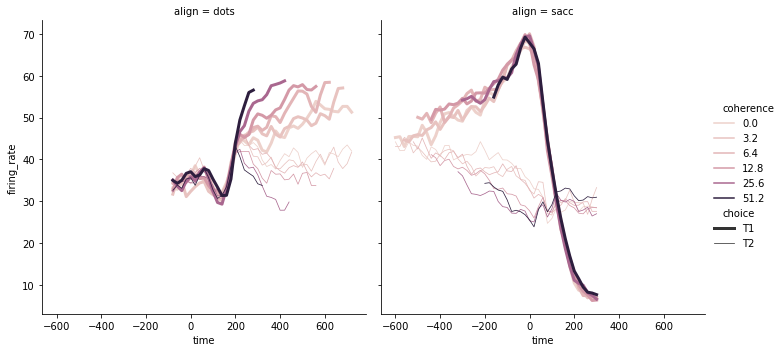

In [31]:
sns.relplot(data=dots, x='time', y='firing_rate',
            kind='line',
            hue='coherence',
            col='align',
            size='choice',
            height=5, aspect=1
            )

# Line plot

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

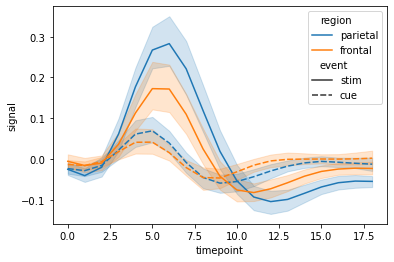

In [32]:
sns.lineplot(data=fmri, x='timepoint', y='signal',
             hue='region',
             style='event')

# Style

In [33]:
### reset default
sns.set_theme()

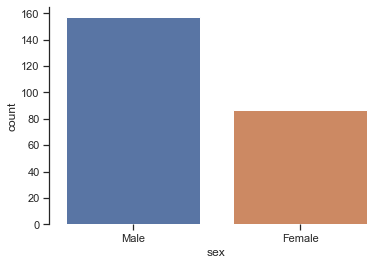

In [34]:
sns.set_style(style='ticks')
### style: 'dark', 'white', 'darkgrid', 'whitegrid', 'ticks'

sns.countplot(data=tips, x='sex')
sns.despine(top=True, right=True, bottom=True, left=False)

<AxesSubplot:xlabel='sex', ylabel='count'>

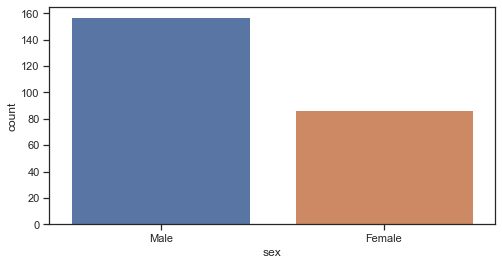

In [35]:
plt.figure(figsize=(8,4))
sns.countplot(data=tips, x='sex')

<AxesSubplot:xlabel='sex', ylabel='count'>

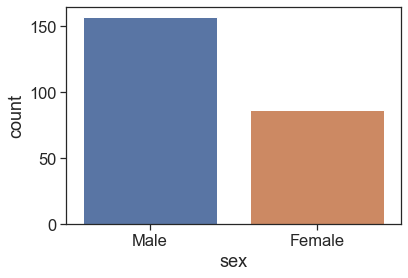

In [36]:
sns.set_context(context='notebook',
                font_scale=1.5)
### context: 'poster', 'talk', 'paper', 'notebook'
sns.countplot(data=tips, x='sex')

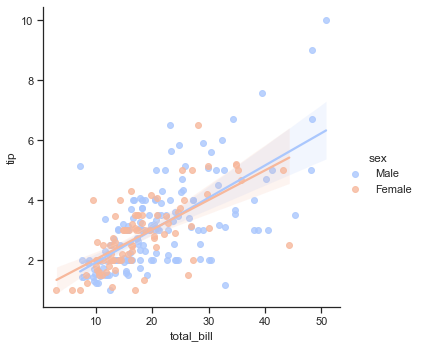

In [37]:
sns.set_context(context='notebook', font_scale=1)
sns.lmplot(data=tips, x='total_bill', y='tip',
           hue='sex',
           palette='coolwarm')
### palette: 'viridis', 'magma', 'plasma', 'YlOrBr', 'Spectral', 'coolwarm'

<AxesSubplot:xlabel='sex', ylabel='count'>

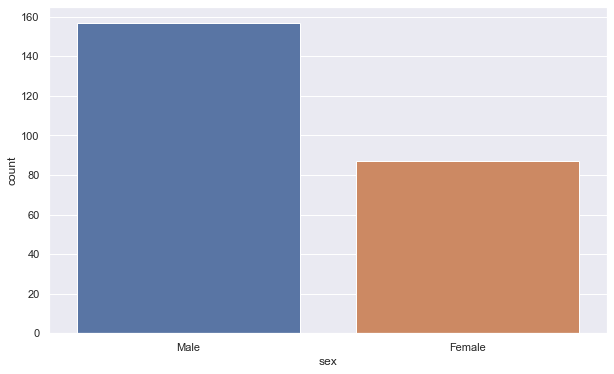

In [38]:
### set global figure size 
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(data=tips, x='sex')

[Text(0.5, 1.0, 'Sex Count')]

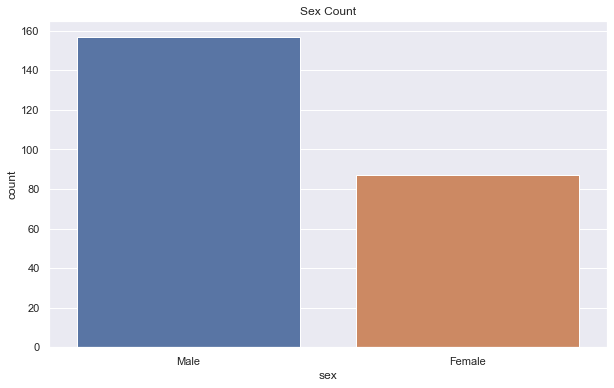

In [39]:
### add a title to one plot
sns.countplot(data=tips, x='sex').set(title='Sex Count') ###

Text(0.5, 0.98, 'Sex Count')

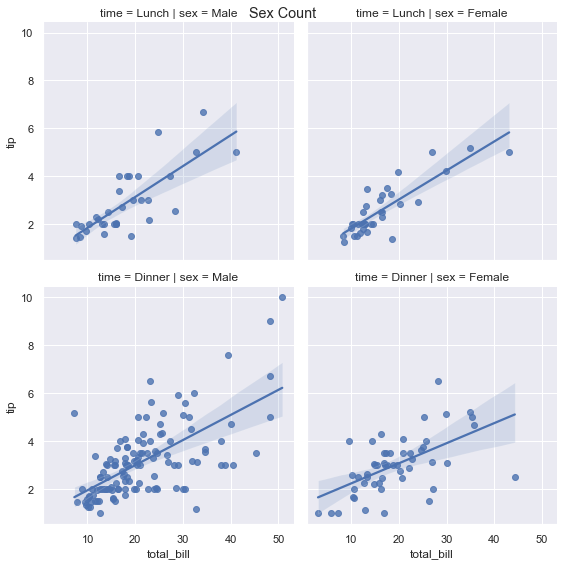

In [42]:
### add a super title to a multi-plot
lm = sns.lmplot(data=tips, x='total_bill', y='tip',
           col='sex',
           row='time',
           aspect=1,
           height=4)
lm.fig.suptitle('Sex Count') ###

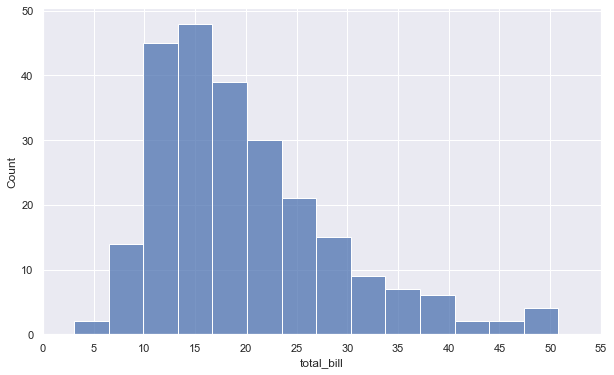

In [48]:
### add more x ticks 
ht = sns.histplot(data=tips, x='total_bill')
ht.set_xticks(range(0,60,5))
plt.show()